<a href="https://colab.research.google.com/github/Elbereth-Elentari/Book_recommender/blob/master/Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud
import math

from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [25]:
cat = pd.read_json('/content/drive/My Drive/Library_catalogue_preprocessed.jl', lines=True)
int_en = cat[(cat['interesting'] == 'yes') & (cat['language'] == 'en')]
dict_en = corpora.Dictionary(int_en.tokens)
corpus_en = [dict_en.doc2bow(doc) for doc in int_en.tokens]

int_pl = cat[(cat['interesting'] == 'yes') & (cat['language'] == 'pl')]
dict_pl = corpora.Dictionary(int_pl.tokens)
corpus_pl = [dict_pl.doc2bow(doc) for doc in int_pl.tokens]

In [40]:
lda_en = LdaModel(corpus_en, num_topics=5, id2word=dict_en, passes=200)

In [45]:
for topic in lda_en.print_topics(num_topics=5, num_words=4):
    print(topic)

(0, '0.069*"sherlock" + 0.069*"holmes" + 0.048*"harry" + 0.048*"potter"')
(1, '0.023*"world" + 0.023*"ballad" + 0.023*"white" + 0.023*"horse"')
(2, '0.023*"high" + 0.023*"artist" + 0.012*"culture" + 0.012*"city"')
(3, '0.046*"essay" + 0.024*"story" + 0.017*"man" + 0.017*"world"')
(4, '0.040*"aesthetic" + 0.021*"energy" + 0.021*"father" + 0.021*"brown"')


In [42]:
lda_pl = LdaModel(corpus_pl, num_topics=15, id2word=dict_pl, passes=500)

In [43]:
for topic in lda_pl.print_topics(num_topics=7, num_words=5):
    print(topic)

(1, '0.021*"człowiek" + 0.021*"żyto" + 0.014*"dane" + 0.014*"diabeł" + 0.014*"młody"')
(10, '0.019*"data" + 0.019*"science" + 0.013*"wampir" + 0.013*"wpływ" + 0.013*"cygany"')
(8, '0.055*"sherlock" + 0.055*"holmes" + 0.010*"przygoda" + 0.010*"kariera" + 0.010*"dobry"')
(3, '0.024*"zjeść" + 0.024*"żaba" + 0.018*"praca" + 0.018*"zwalczanie" + 0.018*"metoda"')
(12, '0.019*"człowiek" + 0.013*"opowiadanie" + 0.013*"swój" + 0.013*"mylny" + 0.007*"satysfację"')
(0, '0.022*"opowieść" + 0.022*"zespół" + 0.022*"przywództwo" + 0.015*"żyć" + 0.015*"aspergera"')
(11, '0.022*"świat" + 0.022*"ksiądz" + 0.022*"brown" + 0.011*"przygoda" + 0.011*"przewodnik"')


In [48]:
cloud = WordCloud(background_color='white', width=2500, height=1800, max_words=10)
topics_en = lda_en.show_topics(formatted=False)
topics_pl = lda_pl.show_topics(formatted=False)

In [79]:
def show_wordclouds(topics):
    fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')

    plt.tight_layout()
    plt.show()

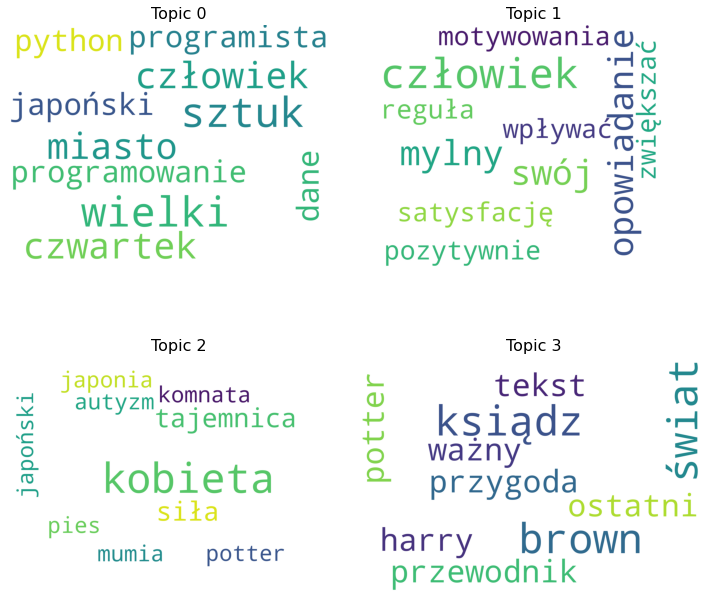

In [80]:
show_wordclouds(topics_pl)

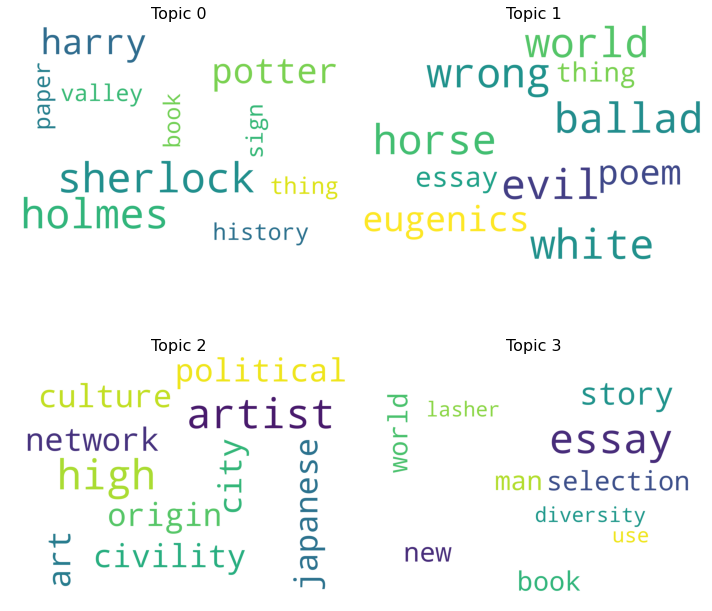

In [81]:
show_wordclouds(topics_en)

In [154]:
def show_tsne(model, corpus):
    topic_weights = []
    for i, row_list in enumerate(model[corpus]):
        topic_weights.append([w for i, w in row_list])
    arr = pd.DataFrame(topic_weights).fillna(0).values
    arr = arr[np.amax(arr, axis=1) > 0.35]
    topic_num = np.argmax(arr, axis=1)

    tsne_model = TSNE(n_components=2, verbose=0, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(arr)

    output_notebook()
    mycolors = np.array([color for name, color in list(mcolors.TABLEAU_COLORS.items())*2])
    plot = figure(title='t-SNE Clustering of {} LDA Topics'.format(max(topic_num)+1), 
                  plot_width=900, plot_height=700)
    plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
    show(plot)

In [155]:
_ = show_tsne(lda_pl, corpus_pl)

In [156]:
_ = show_tsne(lda_en, corpus_en)